# Tarea 7 (decidiendo frecuencia de muestreo, tiempo de grabación y corrigiendo amplitudes)

Para esta tarea usted debe usar el script EjemTransfFourierMultiplesSenales,m adjunto abajo, note que ahora se tiene una suma de dos señales cosenoidales, usando su propia función  desarrollada en la tarea 6 (CalculaVerdaderaAmplitud), grafique la amplitud de las frecuencias corregidas, notará que no dan las 3 deltas de Kronecker esperadas, la primera en la frecuencia 0 con amplitud 1.5, la segunda en la frecuencia 1 con altura 2 y la tercera en la frecuencia 1.1 con altura 2.5.

Recordando que dada la periodicidad de la señal en el tiempo usted debe asegurar que el tiempo de grabación sea el indicado para que no se trunque ninguna de los cosenos que forman la señal, y recordando que debe elegir un periodo de muestreo tal que la resolución en frecuencia (deltaf) permita observar las diferencias entre frecuencias de ambas señales; Encuentr los valores de TGrabacion y Tmuestreo que haga que la amplitud de la transformada de Fourier sea la esperada. Elija el valor más grande posible de Tmuestreo.

Reporte los datos de  TGrabacion y Tmuestreo que usó y muestre un zoom en la gráfica que demuestre que la elección anterior efectivamente logró hacer que la amplitud de la transformada sea la esperada.


In [6]:
%matplotlib inline
from numpy.fft import fft,fftshift,ifftshift
from numpy import arange,cos,abs,angle,pi,floor
import matplotlib.pyplot as plt
from calculaVerdaderaAmplitud import calculaVerdaderaAmplitud
from calcVectFrec import calcVecFrec

## Parámetro para el muestreo de los datos en el dominio del tiempo

In [113]:
T_muestreo = 0.4 # Periodo de muestreo
t_grabacion = 10 # Tiempo total de grabacion de datos (segundos)
# Formamos un array que va desde 0 a t_grabacion-Tmuestreo con incrementos de T_muestreo
t = arange(0,t_grabacion,T_muestreo)

## Construyendo señal a analizar

In [114]:
frecSenal1 = 1   # Hz 
frecSenal2 = 1.1 # Hz
a1 = 2   # Amplitud de la primera señal 
a2 = 2.5 # Amplitud de la segunda señal

senal = a1*cos(2*pi*frecSenal1*t) + a2*cos(2*pi*frecSenal2*t) + 1.5 # Construimos la señal  

## Graficando la señal de entrada

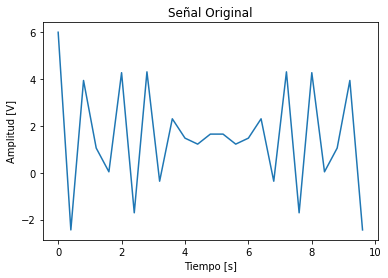

In [115]:
plt.plot(t,senal)
plt.title("Señal Original")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.savefig("Senal_original_despues_lim")

## Calculando la transformada de Fourier

In [116]:
fft_senal = fft(senal)
ampitud_fft = calculaVerdaderaAmplitud(fft=fft_senal)
vfreq = calcVecFrec(senal,T_muestreo)

## Graficando resultados

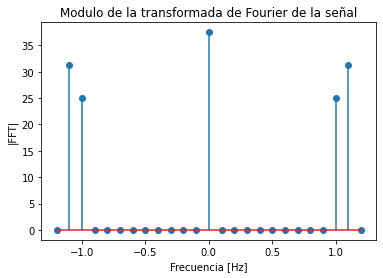

In [117]:
plt.stem(fftshift(vfreq),abs(fftshift(fft_senal)))
plt.title("Modulo de la transformada de Fourier de la señal")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("|FFT|")
plt.savefig("FFT_senal_despues_lim")

In [118]:
n = len(fft_senal)
if(n%2 == 0):
    lim = floor(n/2)
else:
    lim = floor(n/2)+1
vfreqpos = vfreq[0:int(lim)]

## Acercamiento

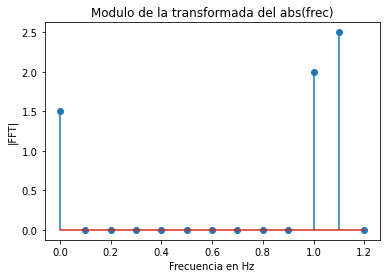

In [120]:
plt.stem(vfreqpos,ampitud_fft)
#plt.xlim([0,2])
plt.title("Modulo de la transformada del abs(frec)")
plt.xlabel("Frecuencia en Hz")
plt.ylabel("|FFT|")
plt.savefig("FFT_verdadera_amplitud_amp_despues_lim")

## Respuestas

Primero debemos hallar el periodo de la función original, con ello podemos ajustar el tiempo de grabación y así no afectar la periodicidad de la función como en los casos anteriores.

Sea f(t) = senal, si f(t) es periodica, entonces $f(t+T) = f(t)$:

$f(t+T) = 2Cos(2\pi [t+T])+2.5Cos(2\pi (1.1)[t+T])+1.5 = 2Cos(2\pi t) + 2.5Cos(2\pi (1.1)t) + 1.5 = f(t)$

Simplificando obtenemos:

$2Cos(2\pi t+ 2\pi T)+2.5Cos(2\pi (1.1)t+ 2\pi (1.1)T) = 2Cos(2\pi t) + 2.5Cos(2\pi (1.1)t)$

Ahora, igualando términos:

$2Cos(2\pi t+ 2\pi T]) = 2Cos(2\pi t )$ y $2.5Cos(2\pi (1.1)t + 2\pi (1.1)T) = 2.5Cos(2\pi (1.1)t)$

Luego, dada la periodicidad de las funciones coseno:

$2Cos(2\pi t+ 2\pi T]) = 2Cos(2\pi t  + 2K_{1}\pi)$ y $2.5Cos(2\pi (1.1)t + 2\pi (1.1)T) = 2.5Cos(2\pi (1.1)t + 2K_{2}\pi)$

con $K_{1}$ y $K_{2}$ números enteros, llegamos a que:

$T = K_{1} = \frac{1}{1.1} K_{2}$ o bien $K_{1} = \frac{10}{11}K_{2}$

los valores más pequeños son $K_{1} = 10$ y $K_{2} = 11$ que dan como resultado T = 10

Por lo tanto debemos escoger Tgrabacion = 10 s para que la señal sea periodica.

Ahora, el valor más grande de TMuestreo es aquel que hace que en el espacio de Fourier las frecuencias más altas y más bajas apenas sean del orden de la frecuencia2 (es decir 1.1 Hz)

Por el teorema de muestreo sabemos que:

$\frac{1}{T_{muestreo}} > 2 frecuencia2 $ sustituyendo datos $\frac{1}{T_{muestreo}} > 2(1.1) = 2.2$

Una buena elección seria que:

$\frac{1}{T_{muestreo}} = 2.5 = \frac{5}{2} \Rightarrow T_{muestreo} = \frac{2}{5} = 0.4$ 

In [44]:
deltaf=vfreqpos[1]-vfreqpos[0]
deltaf

0.1